In [48]:
#Importing packages
import pandas as pd
import numpy as np  
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
#Reading in training data
hndl = open("titanic/train.csv")
dftr = pd.read_csv(hndl)
dftr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#Datafields
print(dftr.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


These are the available features in our model. We have to find out which of these are relevant to the survivability of the passengers on board. Let us extract some key features of the demographic.

In [35]:
#Splitting df by sex and survival:
pass_fem = dftr.loc[dftr['Sex'] == 'female']; pass_fem_surv = pass_fem.loc[(pass_fem['Survived'] == 1)]
pass_m = dftr.loc[dftr['Sex'] == 'male']; pass_m_surv = pass_m.loc[(pass_m['Survived'] == 1)]
#Survival rate per sex
rate_f = round(pass_fem_surv.shape[0]/pass_fem.shape[0], 2); print(f"Survival rate of female passengers is {rate_f}")
rate_m = round(pass_m_surv.shape[0]/pass_m.shape[0], 2); print(f"Survival rate of male passengers is {rate_m}")
#Splitting df by class and survival
pass_c3 = dftr.loc[dftr['Pclass'] == 3]; pass_c3_surv = pass_c3.loc[(pass_c3['Survived'] == 1)]
pass_c2 = dftr.loc[dftr['Pclass'] == 2]; pass_c2_surv = pass_c2.loc[(pass_c2['Survived'] == 1)]
pass_c1 = dftr.loc[dftr['Pclass'] == 1]; pass_c1_surv = pass_c1.loc[(pass_c1['Survived'] == 1)]
#Survival rate per class
rate_c3 = round(pass_c3_surv.shape[0]/pass_c3.shape[0], 2); print(f"Survival rate of 3rd class passengers is {rate_c3}")
rate_c2= round(pass_c2_surv.shape[0]/pass_c2.shape[0], 2); print(f"Survival rate of 2nd class passengers is {rate_c2}")
rate_c1 = round(pass_c1_surv.shape[0]/pass_c1.shape[0], 2); print(f"Survival rate of 1st class passengers is {rate_c1}")


(314, 12)


'\n#Survival rate per sex\nrate_f = round(pass_fem_surv.shape[0]/pass_fem.shape[0], 2); print(f"Survival rate of female passengers is {rate_f}")\nrate_m = round(pass_m_surv.shape[0]/pass_m.shape[0], 2); print(f"Survival rate of male passengers is {rate_m}")\n#Splitting df by class and survival\npass_c3 = dftr.loc[dftr[\'Pclass\'] == 3]; pass_c3_surv = pass_c3.loc[(pass_c3[\'Survived\'] == 1)]\npass_c2 = dftr.loc[dftr[\'Pclass\'] == 2]; pass_c2_surv = pass_c2.loc[(pass_c2[\'Survived\'] == 1)]\npass_c1 = dftr.loc[dftr[\'Pclass\'] == 1]; pass_c1_surv = pass_c1.loc[(pass_c1[\'Survived\'] == 1)]\n#Survival rate per class\nrate_c3 = round(pass_c3_surv.shape[0]/pass_c3.shape[0], 2); print(f"Survival rate of 3rd class passengers is {rate_c3}")\nrate_c2= round(pass_c2_surv.shape[0]/pass_c2.shape[0], 2); print(f"Survival rate of 2nd class passengers is {rate_c2}")\nrate_c1 = round(pass_c1_surv.shape[0]/pass_c1.shape[0], 2); print(f"Survival rate of 1st class passengers is {rate_c1}")\n'

From above data we an see that <b>sex</b> and <b>ticket class</b> may have a significant effect on the survivability of passengers. Thus, these are data fields we should include in our model.

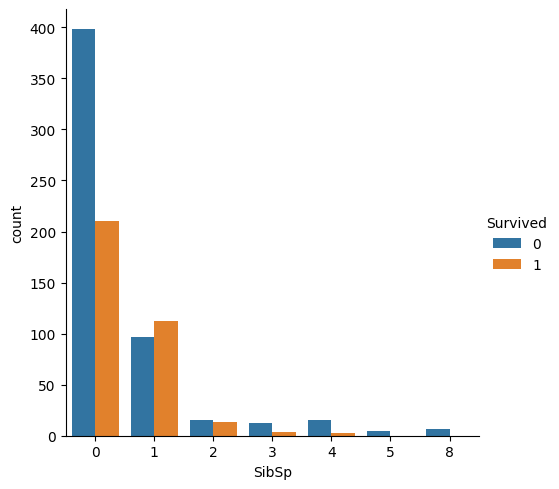

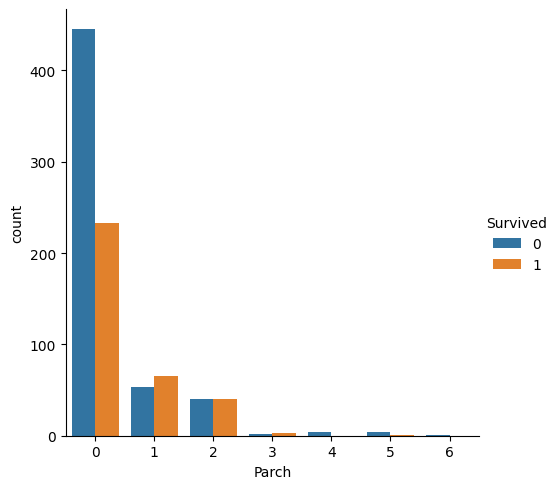

In [19]:
sns.catplot(x ='SibSp', hue ='Survived', data=dftr, kind="count")
sns.catplot(x ='Parch', hue ='Survived', data=dftr, kind="count")

In [75]:
#Dropping Name, Embarked, Ticket and storing data in dftrm
dftrm=dftr.drop(['Name','Embarked','Ticket','Cabin'],axis=1)
dftrm.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


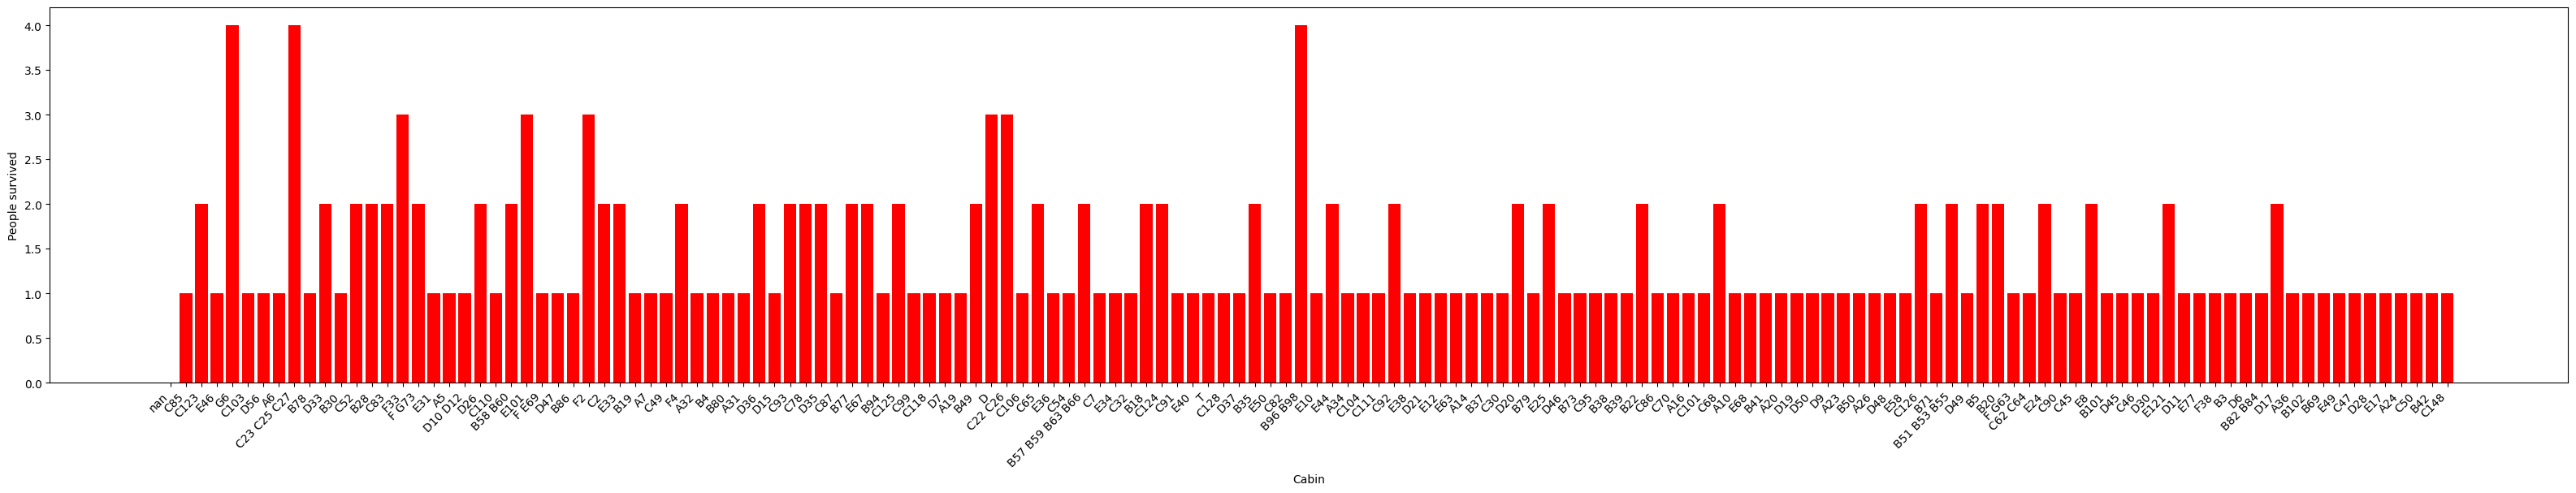

In [77]:
# Getting data of the number of passengers survivved in each cabin 
cab = dftr.Cabin.unique().astype(str)
survival_counts = []

for cabin in cab:
    i=dftr.loc[dftr['Cabin']==cabin]
    count=i.shape[0]
    survival_counts.append(count)

# Plotting the Data 
plt.figure(figsize=(40,6))
plt.bar(cab,survival_counts,color='red')
plt.xlabel('Cabin')
plt.ylabel('People survived')
plt.xticks(rotation=45,ha="right")

plt.show()



From this graph we can also eliminate the Cabin coloum since no single cabin significatly contibutes to the suvivability 